In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from F_model import show_plot

In [2]:
# Load data
df = pd.read_csv('data/generated data/df_gen_0407_1.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df['qs'].fillna(method='ffill', inplace=True)
df['qs'][0] = 0.79
df['batch_id'] = df['batch_id'].astype(str).str.zfill(3)

C:\Users\dxp2904\AppData\Local\Temp\ipykernel_16332\3363391254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['qs'][0] = 0.79


In [4]:
# Number of batches
no_batches=df['batch_id'].value_counts()

In [5]:
# Define X and y
y = pd.Series(df['qs'])
X = df.drop(columns=['qs'], axis=1)

In [6]:
# Split in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 5: Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 6: Predict qs values for each batch
qs_pred = model.predict(df[['time', 'biomass', 'glucose', 'batch_id']])
df['qs_predicted'] = qs_pred

Mean Squared Error: 0.016561068417773057


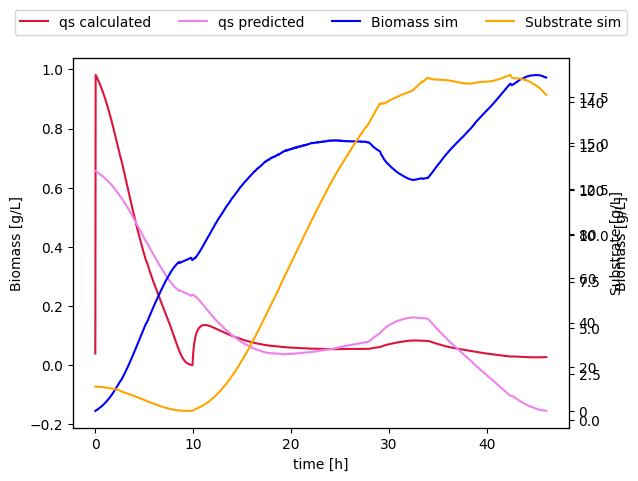

In [8]:
df_one = df[df['batch_id'] == '023']
show_plot(df_one)